# Credit Card Transaction Fraud EDA

by Heba Masarwa

### Introduction



The purpose of this project is to explore credit card fraud detection using machine learning techniques and to create an interactive dashboard. Credit card fraud has increased by more than 70% in 2020, making it increasingly important to identify fraudulent attempts. This is a classification problem, where transactions must be categorized as fraud or non-fraud. Various machine learning techniques can be applied to address this problem, which will be discussed in the machine learning section.

### EDA

In [1]:
# Importing The Libraries

import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing The Data
try:
    df = pd.read_csv('credit_card_transactions.csv')
except:
    print('Error while loading the file')

In [3]:
data = df.copy()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)


data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [5]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

#### coulumns

**Unnamed: 0**

**trans_date_trans_time**: Timestamp of the transaction

**cc_num**: Credit card number (hashed or anonymized)

**merchant**: Merchant or store where the transaction occurred

**category**: Type of transaction (e.g., grocery, entertainment)

**amt**: Amount of the transaction

**first**: First name of the cardholder

**last**: Last name of the cardholder

**gender**: Gender of the cardholder

**street**: Address details of the cardholder

**city**: Address details of the cardholder

**state**: Address details of the cardholder

**zip**: Address details of the cardholder

**lat**: latitude

**long**: longitude

**city_pop**: Population of the city where the transaction occurred

**job**: Occupation of the cardholder

**dob**: Date of birth of the cardholder

**trans_num**: Unique transaction number

**unix_time**: Unix timestamp of the transaction

**merch_lat**: merchant's latitude

**merch_long**: merchant's longitude

**is_fraud**: Indicator of whether the transaction is fraudulent (0 = not fraud, 1 = fraud)

**merch_zipcode**: Geographical coordinates of the merchant

In [6]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0,59870.0


In [7]:
data.shape

(1296675, 24)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
data.stb.missing(style=True)

,missing,total,percent
merch_zipcode,"195,973","1,296,675",15.11%
Unnamed: 0,0,"1,296,675",0.00%
cc_num,0,"1,296,675",0.00%
trans_date_trans_time,0,"1,296,675",0.00%
category,0,"1,296,675",0.00%
amt,0,"1,296,675",0.00%
first,0,"1,296,675",0.00%
merchant,0,"1,296,675",0.00%
last,0,"1,296,675",0.00%
gender,0,"1,296,675",0.00%


#### Data Cleaning

- Removing Unnamed: 0 column.

- Adding Customer_ID column.

- Adding Customer Age column.

- Adjust the trans_date_trans_time column by separating the date and time:

    - Date should follow the '%Y-%m-%d' format.

    - Time should follow the '%H:%M:%S' format.

In [10]:
split_data = data['trans_date_trans_time'].str.split(' ', expand=True)
split_data.head()

,0,1
0,2019-01-01,00:00:18
1,2019-01-01,00:00:44
2,2019-01-01,00:00:51
3,2019-01-01,00:01:16
4,2019-01-01,00:03:06


In [11]:
data.drop(['trans_date_trans_time', 'Unnamed: 0'], axis=1, inplace=True)

In [12]:
data["customer_id_str"] = (
    data["first"].str.lower().str.strip() + "_" +
    data["last"].str.lower().str.strip() + "_" +
    data["gender"].str.lower().str.strip() + "_" +
    data["job"].str.lower().str.strip() + "_" +
    data["city"].str.lower().str.strip()
)
# used a number of identifiers in case of similar names or jobs 

data["customer_id"] = data["customer_id_str"].factorize()[0]

In [29]:
data["dob"] = pd.to_datetime(data["dob"], errors="coerce")

reference_date = pd.to_datetime("today")

data["age"] = (reference_date - data["dob"]).dt.days // 365

data["age"] = data["age"].fillna(data["age"].median())


In [30]:
data['trans_date'] = split_data[0]
data['trans_time'] = split_data[1]
data['trans_time'] = pd.to_datetime(data['trans_time'], format='%H:%M:%S')
data['trans_date'] = pd.to_datetime(data['trans_date'], format='%Y-%m-%d')

data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,customer_id_str,customer_id,trans_date,trans_time,hour,time_bin,day_of_week,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,"jennifer_banks_f_psychologist, counselling_mor...",0,2019-01-01,1900-01-01 00:00:18,0,00:00-02:00,Tuesday,37
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,stephanie_gill_f_special educational needs tea...,1,2019-01-01,1900-01-01 00:00:44,0,00:00-02:00,Tuesday,47
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,edward_sanchez_m_nature conservation officer_m...,2,2019-01-01,1900-01-01 00:00:51,0,00:00-02:00,Tuesday,63
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,jeremy_white_m_patent attorney_boulder,3,2019-01-01,1900-01-01 00:01:16,0,00:00-02:00,Tuesday,58
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,tyler_garcia_m_dance movement psychotherapist_...,4,2019-01-01,1900-01-01 00:03:06,0,00:00-02:00,Tuesday,39


In [14]:
data = data.drop_duplicates()
data.shape

(1296675, 26)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   cc_num           1296675 non-null  int64         
 1   merchant         1296675 non-null  object        
 2   category         1296675 non-null  object        
 3   amt              1296675 non-null  float64       
 4   first            1296675 non-null  object        
 5   last             1296675 non-null  object        
 6   gender           1296675 non-null  object        
 7   street           1296675 non-null  object        
 8   city             1296675 non-null  object        
 9   state            1296675 non-null  object        
 10  zip              1296675 non-null  int64         
 11  lat              1296675 non-null  float64       
 12  long             1296675 non-null  float64       
 13  city_pop         1296675 non-null  int64         
 14  jo

### Visualizations


##### Class Imbalance

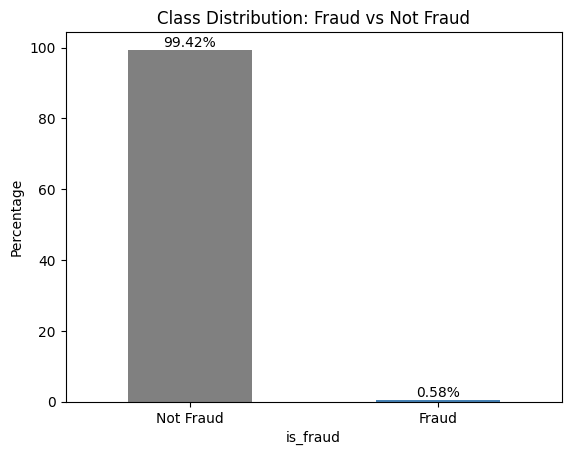

In [16]:
class_counts = data["is_fraud"].value_counts()

class_percentages = data["is_fraud"].value_counts(normalize=True) * 100

ax = class_percentages.plot(kind="bar", color=["gray", "steelblue"])
plt.xticks([0, 1], ["Not Fraud", "Fraud"], rotation=0)
plt.ylabel("Percentage")
plt.title("Class Distribution: Fraud vs Not Fraud")

# Add percentages on top
for i, v in enumerate(class_percentages):
    ax.text(i, v, f"{v:.2f}%", ha="center", va="bottom")

plt.show()

Fraudulent transactions make up only 0.58% of the dataset. This is typical for credit card fraud detection datasets, as the global fraud rate for credit card transactions is estimated to be around 0.05% in the modern digital world.

### Age Distribution  

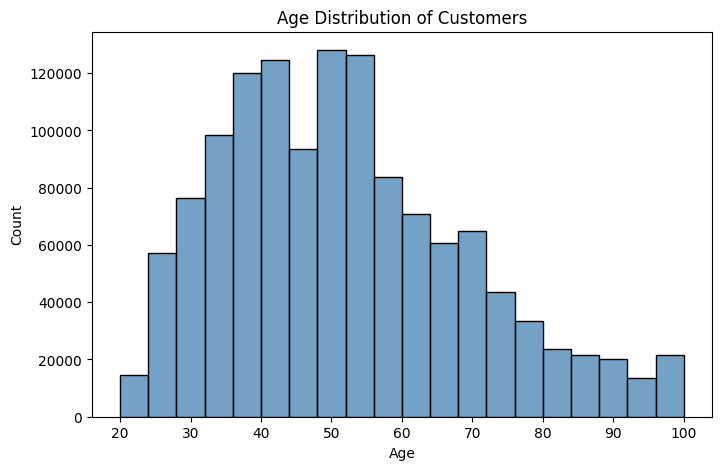

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(data["age"], bins=20, kde=False, color="steelblue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(8,5))


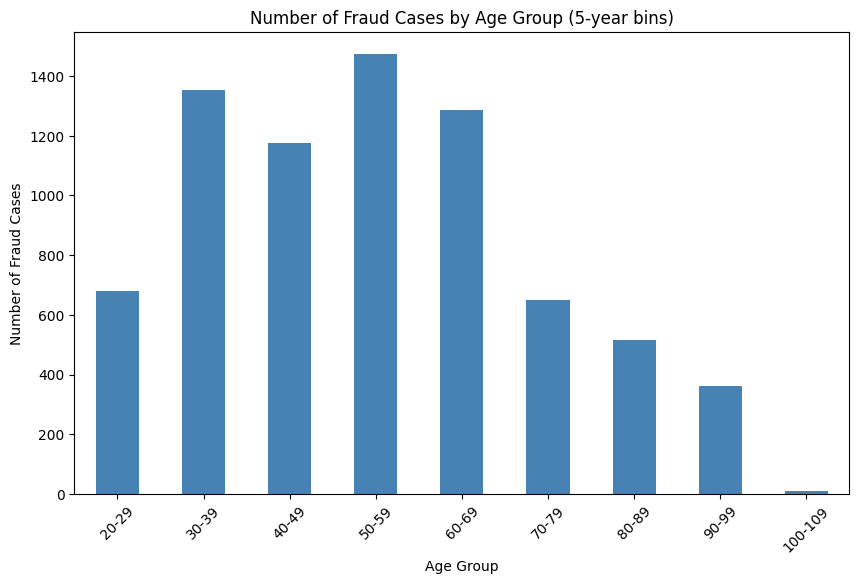

In [45]:
# Defining 5-year bins starting at 20
bins = range(20, data["age"].max() + 15, 10)
labels = [f"{b}-{b+9}" for b in bins[:-1]]

data["age_bin"] = pd.cut(data["age"], bins=bins, labels=labels, right=False)

fraud_counts = data[data["is_fraud"] == 1]["age_bin"].value_counts().sort_index()

plt.figure(figsize=(10,6))
fraud_counts.plot(kind="bar", color="steelblue")
plt.title("Number of Fraud Cases by Age Group (5-year bins)")
plt.xlabel("Age Group")
plt.ylabel("Number of Fraud Cases")
plt.xticks(rotation=45)
plt.show()

The age groups with the highest fraud cases are **50–64** and **25–39**. These results are somewhat surprising, as the common assumption is that older adults are the primary victims of financial fraud. However, recent research shows that younger adults are losing money to fraud at higher rates than older generations, which is reflected in our findings.  

**Source:** [Investopedia – The Surprising Truth About the Age Group Most Likely to Fall for Financial Fraud](https://www.investopedia.com/age-and-financial-fraud-11714608)


##### Avg. Amount for Fraud VS. Non Fruad Transactions

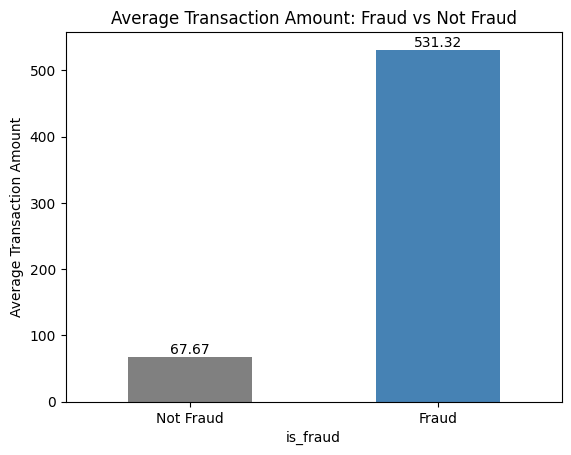

In [17]:
avg_amt = data.groupby("is_fraud")["amt"].mean()

# bar chart
colors = ["gray", "steelblue"]
ax = avg_amt.plot(kind="bar", color=colors)

for i, v in enumerate(avg_amt):
    ax.text(i, v, f"{v:.2f}", ha="center", va="bottom")

plt.xticks([0, 1], ["Not Fraud", "Fraud"], rotation=0)
plt.ylabel("Average Transaction Amount")
plt.title("Average Transaction Amount: Fraud vs Not Fraud")
plt.show()

The average transaction amount for fraud cases is more than five times higher than for non-fraud transactions. This is expected, as fraudulent transactions typically involve large sums to maximize gain from the customer.

##### Top 10 Merchants by Fraud vs Non-Fraud Transactions

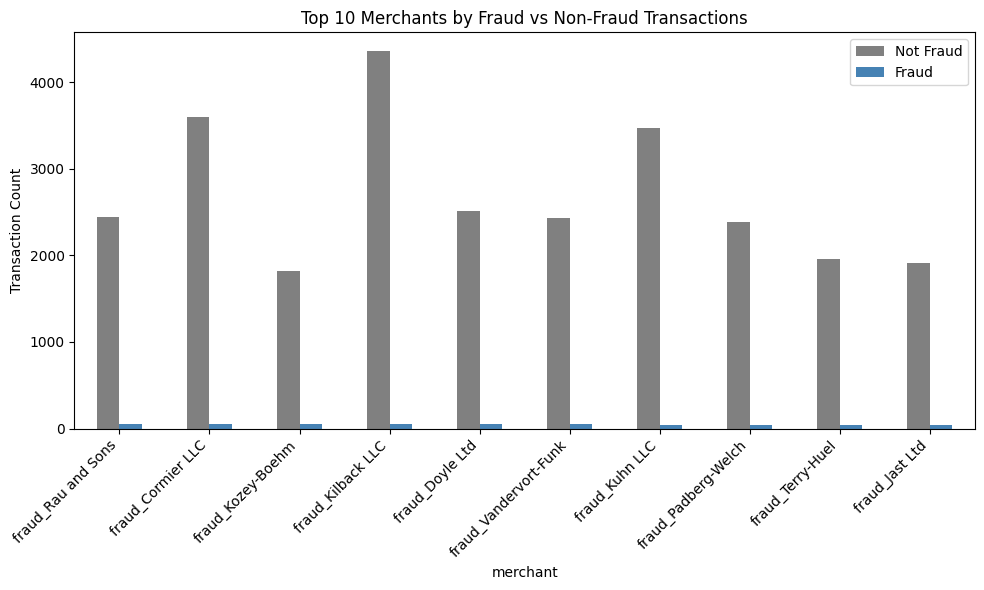

In [18]:
merchant_counts = data.groupby(["merchant", "is_fraud"]).size().unstack(fill_value=0)

# Keep only top 10 merchants ranked by fraud count
top10 = merchant_counts.sort_values(by=1, ascending=False).head(10)

# Plot
top10.plot(kind="bar", figsize=(10, 6), color=["gray", "steelblue"])

plt.ylabel("Transaction Count")
plt.title("Top 10 Merchants by Fraud vs Non-Fraud Transactions")
plt.xticks(rotation=45, ha="right")
plt.legend(["Not Fraud", "Fraud"])
plt.tight_layout()
plt.show()



For this visualization, we show only the top 10 merchants to make it easier to read and interpret. Understanding how frequently these merchants experience fraud can guide feature selection and improve the fraud detection model.

##### Top 10 Categories by Fraud vs Non-Fraud Transactions

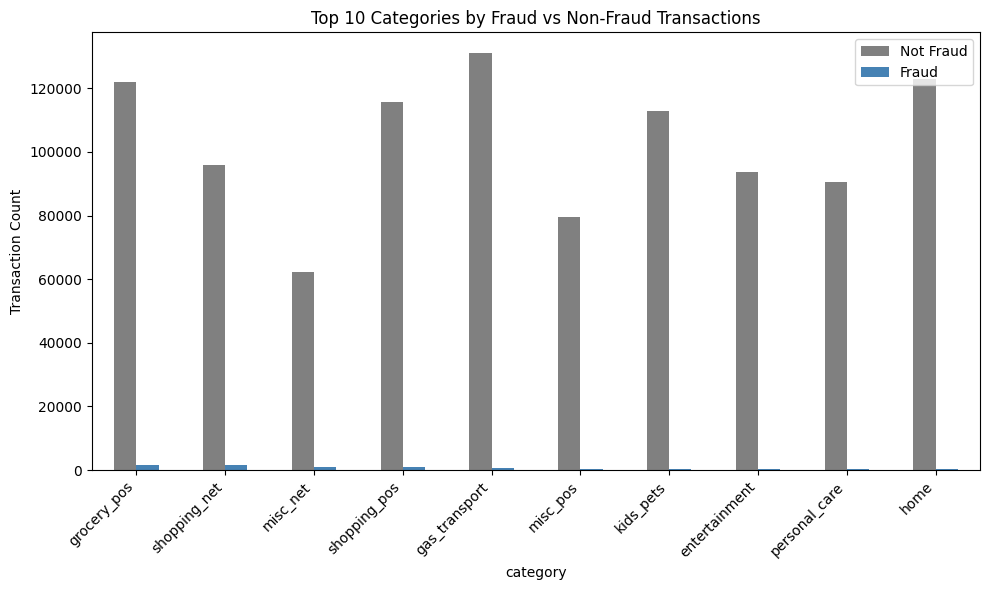

In [19]:
category_counts = data.groupby(["category", "is_fraud"]).size().unstack(fill_value=0)

top10 = category_counts.sort_values(by=1, ascending=False).head(10)

# Plot
top10.plot(kind="bar", figsize=(10, 6), color=["gray", "steelblue"])

plt.ylabel("Transaction Count")
plt.title("Top 10 Categories by Fraud vs Non-Fraud Transactions")
plt.xticks(rotation=45, ha="right")
plt.legend(["Not Fraud", "Fraud"])
plt.tight_layout()
plt.show()


For this visualization, we show only the top 10 categories to make it easier to read and interpret. Knowing which categories are more likely to be targeted by fraud can help guide feature selection and provide insights into transaction patterns that may indicate higher fraud risk.

##### Top 10 Categories: Transactions & Avg Amount

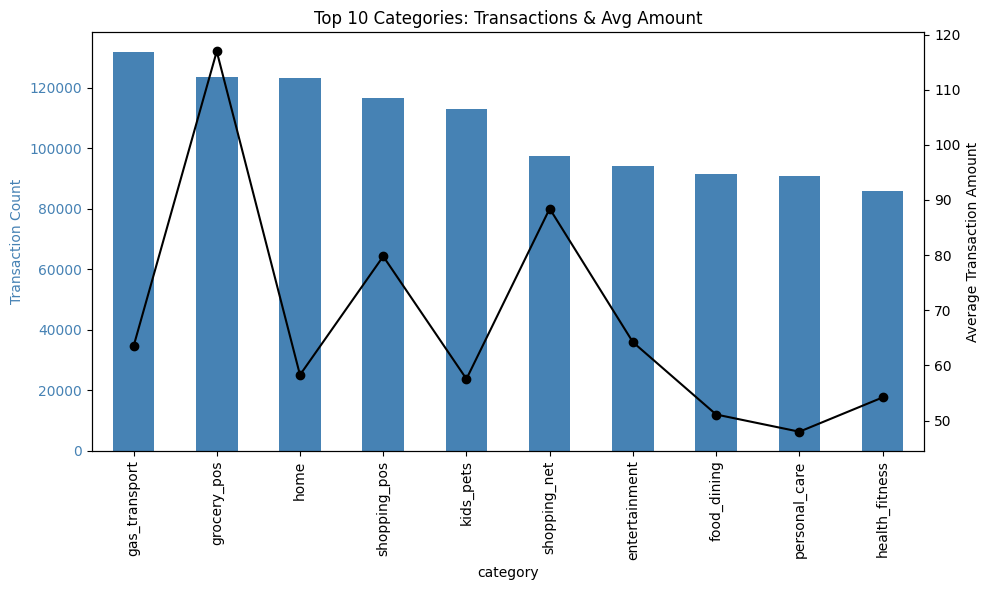

In [20]:
category_stats = (
    data.groupby("category")
    .agg(transaction_count=("trans_num", "count"),
         avg_amt=("amt", "mean"))
    .sort_values(by="transaction_count", ascending=False)
    .head(10)
)

# Plot counts
fig, ax1 = plt.subplots(figsize=(10,6))

category_stats["transaction_count"].plot(kind="bar", color="steelblue", ax=ax1)
ax1.set_ylabel("Transaction Count", color="steelblue")
ax1.set_title("Top 10 Categories: Transactions & Avg Amount")
ax1.tick_params(axis="y", labelcolor="steelblue")

# Plot avg amounts on secondary axis
ax2 = ax1.twinx()
category_stats["avg_amt"].plot(kind="line", color="black", marker="o", ax=ax2)
ax2.set_ylabel("Average Transaction Amount", color="black")
ax2.tick_params(axis="y", labelcolor="black")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


For this visualization, we show only the top 10 categories to make it easier to read and interpret. Knowing the average transaction amount for each category can help the system identify potentially fraudulent purchases. The visualization also shows that for some categories, the average transaction amount varies greatly, indicating that certain categories may be more susceptible to high-value frauds.

##### Top 10 Cities by Fraud vs Non-Fraud Transactions

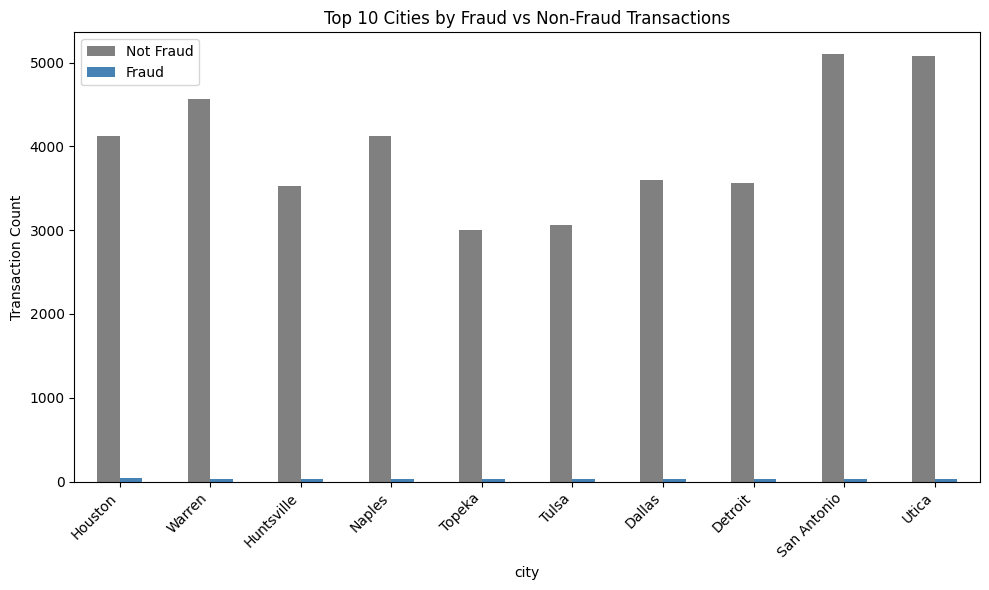

In [21]:
city_counts = data.groupby(["city", "is_fraud"]).size().unstack(fill_value=0)

# Keep only top 10 merchants ranked by fraud count
top10 = city_counts.sort_values(by=1, ascending=False).head(10)

# Plot
top10.plot(kind="bar", figsize=(10, 6), color=["gray", "steelblue"])

plt.ylabel("Transaction Count")
plt.title("Top 10 Cities by Fraud vs Non-Fraud Transactions")
plt.xticks(rotation=45, ha="right")
plt.legend(["Not Fraud", "Fraud"])
plt.tight_layout()
plt.show()

For this visualization, we show only the top 10 cities to make it easier to read and interpret. Identifying cities with the most fraud occurrences can help alert the system and guide feature selection for the fraud detection model.

##### Top 10 States by Fraud vs Non-Fraud Transactions

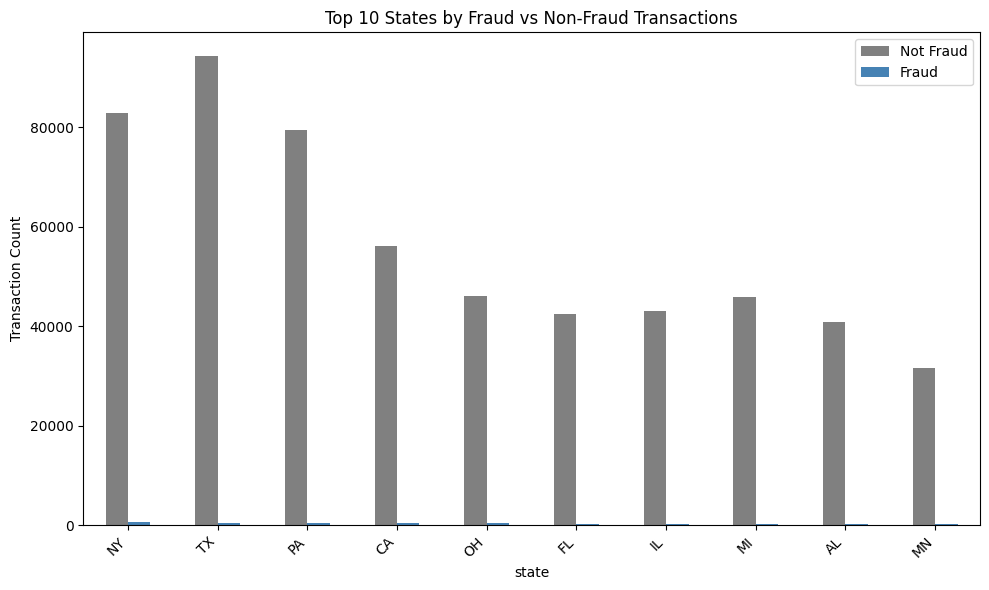

In [22]:
state_counts = data.groupby(["state", "is_fraud"]).size().unstack(fill_value=0)

# Keep only top 10 merchants ranked by fraud count
top10 = state_counts.sort_values(by=1, ascending=False).head(10)

# Plot
top10.plot(kind="bar", figsize=(10, 6), color=["gray", "steelblue"])

plt.ylabel("Transaction Count")
plt.title("Top 10 States by Fraud vs Non-Fraud Transactions")
plt.xticks(rotation=45, ha="right")
plt.legend(["Not Fraud", "Fraud"])
plt.tight_layout()
plt.show()

For this visualization, we show only the top 10 states to make it easier to read and interpret. Identifying states with the most fraud occurrences can help alert the system and guide feature selection for the fraud detection model.

##### What Transaction Time has the Most Fraud cases?

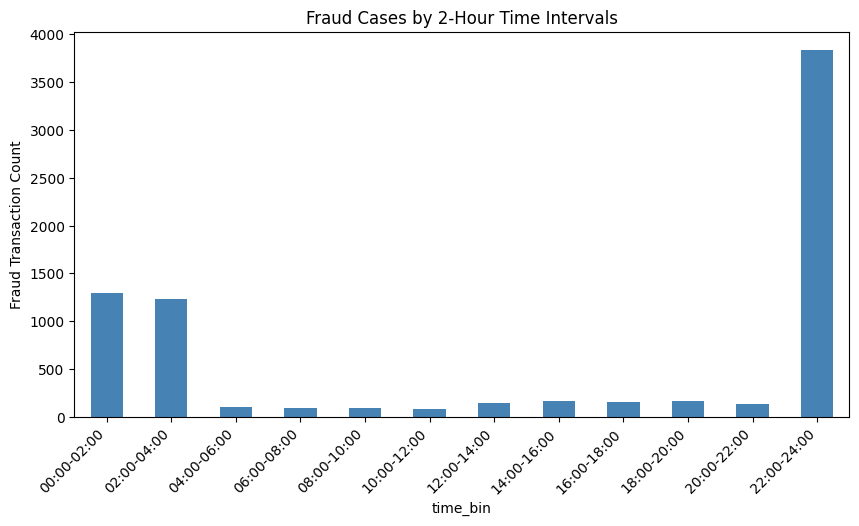

In [23]:
data["hour"] = pd.to_datetime(data["trans_time"].astype(str)).dt.hour

# Creating 2-hour bins
bins = list(range(0, 25, 2))  # [0,2,4,...,24]
labels = [f"{h:02d}:00-{h+2:02d}:00" for h in bins[:-1]]
data["time_bin"] = pd.cut(data["hour"], bins=bins, labels=labels, right=False)

fraud_by_time = data[data["is_fraud"] == 1]["time_bin"].value_counts().sort_index()

fraud_by_time.plot(kind="bar", color="steelblue", figsize=(10,5))
plt.ylabel("Fraud Transaction Count")
plt.title("Fraud Cases by 2-Hour Time Intervals")
plt.xticks(rotation=45, ha="right")
plt.show()

The transaction time interval with the most fraud cases is 22:00–24:00. The next highest intervals are 00:00–02:00 and 02:00–04:00. All of these occur late at night, when customers are unlikely to be making large purchases, highlighting unusual activity that may indicate fraud.

#### Day of the Week with Most Fraud Cases

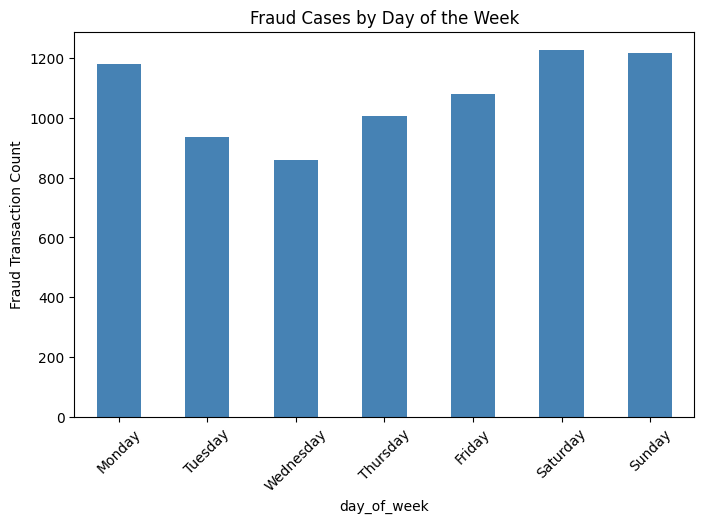

In [24]:
data["day_of_week"] = data["trans_date"].dt.day_name()

fraud_by_day = data[data["is_fraud"] == 1]["day_of_week"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

fraud_by_day.plot(kind="bar", color="steelblue", figsize=(8,5))
plt.ylabel("Fraud Transaction Count")
plt.title("Fraud Cases by Day of the Week")
plt.xticks(rotation=45)
plt.show()

The days with the highest likelihood of fraud are Saturday, followed closely by Sunday, and then Monday. This pattern suggests that fraudulent transactions are more frequent over the weekend and at the start of the week, possibly when monitoring is lower or customer activity patterns are more predictable for fraudsters.

### Data Extraction

In [ ]:
data.to_csv("credit_card_cleaned.csv", index=False)